## FUNDAMENTALS OF DATA SCIENCE ASSESSMENT
STUDENT ID: 202427707

In [1]:
# Import Relevant Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Data Overview

In [4]:
# Load dataset from path
data= pd.read_csv('W-T2_A24census-7.csv')
census_data= data.copy() # Copy data to a new variable so as to keep the original copy for reference
census_data.head() # Show top entries

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Forks,Alice,Nicholson-Lowe,52,Head,Married,Female,Microbiologist,NaN,NaN
1,1,Scott Forks,Mitchell,Nicholson-Lowe,59,Husband,Married,Male,Homeopath,NaN,NaN
2,1,Scott Forks,Bernard,Nicholson-Lowe,14,Son,NaN,Male,Student,NaN,NaN
3,1,Scott Forks,Kieran,Nicholson-Lowe,13,Son,NaN,Male,Student,NaN,NaN
4,2,Scott Forks,Amy,Nicholls,41,Head,Married,Female,Publishing copy,NaN,Christian


In [3]:
# Print missing value()
print(data.isna().sum()) # Preliminary Check

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     714
Marital Status                   2193
Gender                              0
Occupation                          0
Infirmity                        9465
Religion                         5428
dtype: int64


# Preprocessing

## Age

In [4]:
print('Unique Age: ', data['Age'].unique()) # Unique entries in Age

print('\n'+'NaN :', data['Age'].isna().sum(),'Empty Row :', len(data[data['Age']==' '])) # print of nan/empty entries

Unique Age:  ['52' '59' '14' '13' '41' '43' '12' '76' '78' '48' '20' '16' '8' '39' '6'
 '1' '65' '66' '29' '26' '73' '38' '31' '34' '3' '0' '60' '62' '25' '22'
 '18' '56' '53' '19' '75' '36' '42' '35' '23' '49' '27' '89' '86' '11'
 '54' '24' '44' '45' '51' '55' '47' '21' '57' '68' '72' '40' '33' '30'
 '63' '50' '4' '71' '85' '10' '67' '64' '32' '2' '9' '5' '61' '15' '17'
 '7' '58' '81' '74' '77' '46' '69' '80' '37' '28' '83' '79' '70' '92' '84'
 '93' '82' '79.77226286' '82.77226286' '87' '103' '95' '106' '88' '100'
 '91' '90.6967748' '96' '105' '94' '102' '104' '108' '90' 'twenty eight'
 '107' '98' ' ' '80.58881184' '97' '62.70684789' '61.70684789'
 '71.43034858' '72.43034858']

NaN : 0 Empty Row : 1


In [5]:
# Replace word entry with numeric
census_data['Age'].replace('twenty eight', 28.0, inplace=True)

# Convert to column to numeric
census_data['Age'] = pd.to_numeric(census_data['Age'], errors='coerce') # Let non-numeric e.g empty entries be flagged as NaN

# Show NaN
print('Row with missing value')
print(census_data[census_data['Age'].isna()][['First Name','Surname', 'Gender', 'Relationship to Head of House']])

# Obtain median age for people having similar feature as the individual with empty age entry
median_age= census_data[census_data['Relationship to Head of House']=='Son']['Age'].median()

# since pd.numeric function has now changed the empty row to NaN.
# Replace NaN with median_age above
census_data['Age'].fillna(median_age, inplace=True)

# Convert to interger
census_data['Age'] = census_data['Age'].astype(int)

Row with missing value
     First Name Surname Gender Relationship to Head of House
6487      Reece   Riley   Male                           Son


## House Number

In [6]:
print('Unique Age: ', data['House Number'].unique()) # Print unique entries in Age

print('\n'+'NaN :', data['House Number'].isna().sum(),'Empty Row :', len(data[data['House Number']==' '])) # print of nan/empty entries

Unique Age:  ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' 'Two' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 '100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111'
 '112' '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123'
 '124' '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135'
 '136' '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147'
 '148' '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159'
 '160' '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171'
 '172' '173' '174' '175' '176' '177' '178' '179' '

In [7]:
# Convert word entry in House number column to numeric
census_data['House Number'].replace('Two', '2', inplace=True)

## Marital Status

In [8]:
print('Unique :', data['Marital Status'].unique())  # print unique entries
print('\n'+'NaN :', data['Marital Status'].isna().sum(), 'Empty Row :', len(data[data['Marital Status']==' '])) # print number of nan entries

Unique : ['Married' nan 'Widowed' 'Single' 'Divorced' 'S' 'D' 'M' 'W']

NaN : 2193 Empty Row : 0


In [9]:
# Convert abbreviated entry in Marital Status column to full form for uniformity
census_data['Marital Status'].replace(('S','D','M','W'),('Single','Divorced','Married','Widowed'), inplace=True)

# Update marital status for minors with possible false entry
census_data.loc[
    (census_data['Age'] < 18) & 
    (census_data['Marital Status'].isin(['Married', 'Divorced', 'Widowed']))
, 'Marital Status'] = pd.NA

# Declare under-18 as minors
census_data.loc[census_data['Age'] < 18, 'Marital Status'] = 'Minor'

In [10]:
# Print updated NaN
print( 'NaN: ', census_data['Marital Status'].isna().sum())

NaN:  0


## Gender

In [11]:
print('Unique :', data['Gender'].unique())  # print unique entries
print('\n'+'NaN :', data['Gender'].isna().sum(),'Empty Row :', len(data[data['Gender']==' '])) # print number of nan entries

Unique : ['Female' 'Male' 'M' 'male' 'F' 'female' 'f' 'm' ' ']

NaN : 0 Empty Row : 1


In [12]:
# Display empty row
print('\n'+"The individual with empty row has a feminine first name 'Mary'. Assume she's female"+'\n')
data[data['Gender']==' ']


The individual with empty row has a feminine first name 'Mary'. Assume she's female



,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8713,15,Spencer Avenue,Mary,Brooks,58,Head,Single,,Unemployed,NaN,Christian


In [13]:
# Dictionary assigning new entry to the old one
gender_map = {
    'M': 'Male', 'm': 'Male', 'male': 'Male',
    'F': 'Female', 'f': 'Female', 'female': 'Female',
    ' ': 'Female'  # assuming blank means Female, as per earlier info
}
# Replace abbreviations with Male or Female & Fill empty row with appropriate entry
census_data['Gender'] = census_data['Gender'].replace(gender_map)

## Relationship with Head of House

In [14]:
# Overview
# print number of nan entries
print('Unique :', data['Relationship to Head of House'].unique())  # print unique entries
print('\n'+'NaN :', data['Relationship to Head of House'].isna().sum(),'Empty Row :', len(data[data['Relationship to Head of House']==' ']))

Unique : ['Head' 'Husband' 'Son' 'Daughter' 'Visitor' 'Wife' 'Cousin' nan 'Partner'
 'Granddaughter' 'Lodger' 'Nephew' 'Sibling' 'Neice' 'Grandson'
 'Adopted Son' 'Adopted Daughter' 'Step-Son' 'Step-Daughter'
 'Adopted Grandson' 'Adopted Granddaughter']

NaN : 714 Empty Row : 0


## Relationship with Head of House
For family with missing entries, who should be head?

In [15]:
# Between husband and wife, who is more likely to be head?
print('Husband is head: ', len(data[(data['Relationship to Head of House']=='Head')& (data['Gender']=='Male')]))
print('Wife is head: ', len(data[(data['Relationship to Head of House']=='Head')& (data['Gender']=='Female')]))
# Print conclusion
print('From above, it can be seen that a wife is two times likely to be the head than her husband. So for families with missing values,',
        'wife will be assumed to be the head.')

Husband is head:  1026
Wife is head:  2213
From above, it can be seen that a wife is two times likely to be the head than her husband. So for families with missing values, wife will be assumed to be the head.


In [16]:
# View unique entry to identify most frequent entry.
census_data['Relationship to Head of House'].value_counts().head(5)

Relationship to Head of House
Head        3342
Son         1618
Daughter    1571
Husband      949
Lodger       421
Name: count, dtype: int64

In [17]:
# Define a function that fix missing value
def assign_relationship(row):
    '''
    Function filters household, then fillna based on gender and marital status
    
    '''
    # Apply some conditions and assign them to a variable
    house_street_same = (census_data["House Number"] == row["House Number"]) & (census_data["Street"] == row["Street"]) & (census_data["Relationship to Head of House"].isna())
    
    singles_same_household = census_data[house_street_same & (census_data["Marital Status"] == "Single")]
    # Female are twice as likely to be the Head than Male. let wife be head
    wife = census_data[house_street_same & (census_data["Marital Status"] == "Married") & (census_data["Gender"] == "Female")]
    husband = census_data[house_street_same & (census_data["Marital Status"] == "Married") & (census_data["Gender"] == "Male")]
    son = census_data[house_street_same & (census_data["Marital Status"] == "Minor") & (census_data["Gender"] == "Male")]
    daughter = census_data[house_street_same & (census_data["Marital Status"] == "Minor") & (census_data["Gender"] == "Female")]

    if len(singles_same_household) > 1:
        return "Lodger"
    elif len(singles_same_household) == 1:
        return "Head"
    elif len(wife) > 0:
        return "Head"
    elif len(husband) > 0:
        return "Husband"
    elif len(son) > 0:
        return "Son"
    elif len(daughter) > 0:
        return "Daughter"
    return row["Relationship to Head of House"]  # Keep existing value if no match
census_data["Relationship to Head of House"] = census_data.apply(assign_relationship, axis=1)  # Apply function to the DataFrame

Other NaN not fixed by above function

In [18]:
# Display remaining rows with missing entry
census_data[census_data['Relationship to Head of House'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6437,197,White Branch,Joan,Nicholls,45,NaN,Divorced,Female,"Journalist, magazine",NaN,NaN


In [19]:
# Check if she live with someone else and if they have things in common
census_data[(census_data['Street']=='White Branch')&(census_data['House Number']=='197')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6436,197,White Branch,Shaun,Andrews,41,Head,Single,Male,Higher education lecturer,NaN,Methodist
6437,197,White Branch,Joan,Nicholls,45,NaN,Divorced,Female,"Journalist, magazine",NaN,NaN


In [20]:
# Print assumption
print('The individual is divorced, shares apartment with a single male who his head of house. close age gap but different Surname. I would say she is a visitor')
# Fillna
census_data['Relationship to Head of House'].fillna('Visitor', inplace=True)

The individual is divorced, shares apartment with a single male who his head of house. close age gap but different Surname. I would say she is a visitor


## Infirmity Column Cleaning

In [21]:
# Display unique entries in the Infirmity column
print('Unique :', data['Infirmity'].unique())  # print unique entries
print('\n'+'NaN :', data['Infirmity'].isna().sum(),'Empty Row :', len(data[data['Infirmity']==' '])) # print number of nan entries
print('\n'+'Not NaN :', data['Infirmity'].notna().sum())

Unique : [nan 'Mental Disability' 'Physical Disability' 'Unknown Infection' ' '
 'Blind' 'Deaf' 'Disabled']

NaN : 9465 Empty Row : 15

Not NaN : 78


In [22]:
# Convert empty entries and NaNs to None.
census_data['Infirmity'].replace({' ':'None', None:'None'}, inplace=True)

In [23]:
# Show unique entries
census_data['Infirmity'].unique()

array(['None', 'Mental Disability', 'Physical Disability',
       'Unknown Infection', 'Blind', 'Deaf', 'Disabled'], dtype=object)

## Religion Column Cleaning

In [24]:
# print unique entries
print('Unique :', data['Religion'].unique())
print('\n'+'NaN :', data['Religion'].isna().sum()) # print number of nan entries

Unique : [nan 'Christian' 'Catholic' 'Muslim' 'Methodist' 'Jewish' 'Sikh' 'Nope'
 'Undecided' 'Jedi' 'Orthodoxy' 'Pagan' 'Agnostic' 'Housekeeper']

NaN : 5428


In [25]:
# Convert 'nope' & 'undecided' entries to Agnostic, they are better fitted in this categories
census_data['Religion'].replace({
                                 'Nope': 'Agnostic', 
                                 'Undecided':'Agnostic',
                                 'Catholic': 'Christian',
                                'Methodist': 'Christian',
                                  'Orthodoxy': 'Christian',
                                 'Housekeeper': np.nan}, 
                                  inplace=True)

In [26]:
# Function that fills empty rows in a group with the group mode
def fill_religion(group):
    mode = group.mode() # Assign group mode to a variable
    return group.fillna(mode[0] if not mode.empty else np.nan) # Fill NaN in group with mode
    
# Apply function on dataset
census_data['Religion'] = census_data.groupby('Street')['Religion'].transform(fill_religion)


# Display Remaining missing value
print((census_data[census_data['Religion'].isna()][['House Number', 'Street', 'Surname']]).head())

# A family of five(5) (The Smith's Family) all with missing religion entry appear not to share similar street with anyone else.
# Apply the column mode to fill their religion entry.
religion_mode= census_data['Religion'].mode()
# Replace NaN and Housekeeper entries with mode
census_data['Religion'].replace({None: religion_mode[0]}, inplace=True)

     House Number         Street Surname
9473            1  Johnson Abbey   Smith
9474            1  Johnson Abbey   Smith
9475            1  Johnson Abbey   Smith
9476            1  Johnson Abbey   Smith
9477            1  Johnson Abbey   Smith


## Occupation column

In [3]:
# Unique column list
for n, entry in enumerate(data['Occupation'].unique()[:20]):
    print(n, entry)

0 Microbiologist
1 Homeopath
2 Student
3 Publishing copy
4 Chemical engineer
5 Retired Catering manager
6 Retired Editor, magazine features
7 Community arts worker
8 University Student
9 Unemployed
10 Child
11 Lawyer
12 Engineer, maintenance
13 Physiological scientist
14 Engineer, chemical
15 Pensions consultant
16 Retired Doctor, hospital
17 Immunologist
18 Trade mark attorney
19 Field trials officer


In [28]:
# Reverse comma-separated occupation entries
census_data['Occupation'] = census_data['Occupation'].astype(str).apply(
    lambda x: ' '.join([p.strip() for p in x.split(',')][::-1]) if ',' in x else x.strip()
)

In [29]:
def normalize_retired(entry):
    '''
    Function 
    '''
    # Convert to string and split into words
    words = str(entry).split()
    
    # Check if 'retired' is in the entry (any case)
    if any(w.lower() == 'retired' for w in words):
        # Remove all versions of 'retired'
        words = [w for w in words if w.lower() != 'retired']
        # Add a clean, capitalized 'Retired' at the front
        return 'Retired ' + ' '.join(words)
    
    # If no 'retired' present, return as-is
    return str(entry).strip()

# Apply it to the Occupation column
census_data['Occupation'] = census_data['Occupation'].apply(normalize_retired)


In [30]:
# Define a function that repostion bracketed text
def move_bracket_to_end(entry):
    '''
    A function that moves additional title information in brackets so that it appears after the main job title
    '''
    # Ensure the entry is a string and remove leading/trailing spaces
    entry = str(entry).strip()

    # Check if there is a bracketed part in the entry
    if '(' in entry and ')' in entry:
        # Find the starting and ending index of the first bracketed part
        start = entry.find('(')
        end = entry.find(')') + 1

        # Extract the bracketed part, including the brackets
        bracket_part = entry[start:end]

        # Remove the bracketed part from the original string
        entry_wo_bracket = (entry[:start] + entry[end:]).strip()

        # Combine the cleaned entry and bracketed part at the end
        # `.strip()` ensures no extra spaces at the ends
        return f"{entry_wo_bracket} {bracket_part}".strip()

    # If no brackets are found, just return the cleaned original
    return entry

# Apply the function to the Occupation column
census_data['Occupation'] = census_data['Occupation'].apply(move_bracket_to_end)


In [31]:
# Capitalize all first
census_data['Occupation'] = census_data['Occupation'].apply(lambda x: str(x).strip().title())

# Remove extra spaces from Occupation entries
census_data['Occupation'] = census_data['Occupation'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [32]:
# View empty entry
census_data[census_data['Occupation']=='']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5688,6,Elyarch Drive,Toby,Richardson,42,Lodger,Single,Male,,None,Christian


In [33]:
# Generate occupation mode for group in age bracket as the empty entry
group_mode= census_data[(census_data['Age']>36)&(census_data['Age']<48)]['Occupation'].mode()

# Apply above mode to empty row and merge Phd Student entries to university student
census_data['Occupation']=census_data['Occupation'].replace({
                         'Phd Student': 'University Student',
                          '':group_mode[0]
})

In [34]:
# Update Unemployed 65years old and above to retired
census_data.loc[(census_data['Age'] >= 65) & (census_data['Occupation'] == 'Unemployed'), 'Occupation'] = 'Retired'

# Census Data Analysis

## Age Pyramid

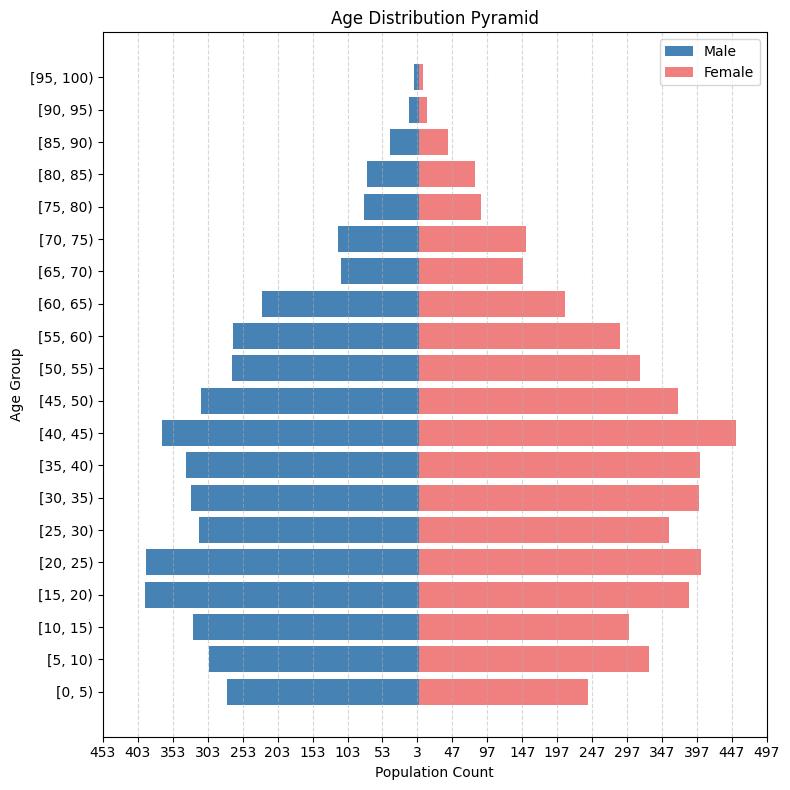

In [37]:
# Define age bins for pyramid
age_bins = list(range(0, 101, 5))  # 0–100 in 5-year intervals
census_data['Age'] = pd.cut(census_data['Age'], bins=age_bins, right=False)

# Group population by AgeGroup and Gender
age_gender_counts = census_data.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

# Create age pyramid
fig, ax = plt.subplots(figsize=(8, 8))

# Plot males (left) and females (right)
ax.barh(age_gender_counts.index.astype(str), -age_gender_counts.get('Male', 0), label='Male', color='steelblue')
ax.barh(age_gender_counts.index.astype(str), age_gender_counts.get('Female', 0), label='Female', color='lightcoral')

# Set labels and title
ax.set_xlabel('Population Count')
ax.set_ylabel('Age Group')
ax.set_title('Age Distribution Pyramid')
ax.legend(loc='upper right')

# Show absolute x-ticks instead of negatives for left side
max_val = max(age_gender_counts.max())
step = 50  # adjust spacing for clarity
xticks = np.arange(-max_val, max_val + step, step)
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks])

# Grid and layout
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
# Save the figure as an image file
plt.savefig('age_distribution_pyramid.png', dpi=300, bbox_inches='tight')
plt.show()


In [480]:
# Total population size
total_population= len(census_data)

# Working Age Percentage of the population
print('Working Age population): ', (len(census_data[(census_data['Age']>=20)&(census_data['Age']<=64)])/total_population)*100)

# Older adult population between 60-64
print('Older Adult(60-64): ', (len(census_data[(census_data['Age']>=60)&(census_data['Age']<=64)])/total_population)*100)


Working Age population):  62.90474693492612
Older Adult(60-64):  4.547836110237871


9543

## Household Size Distribution

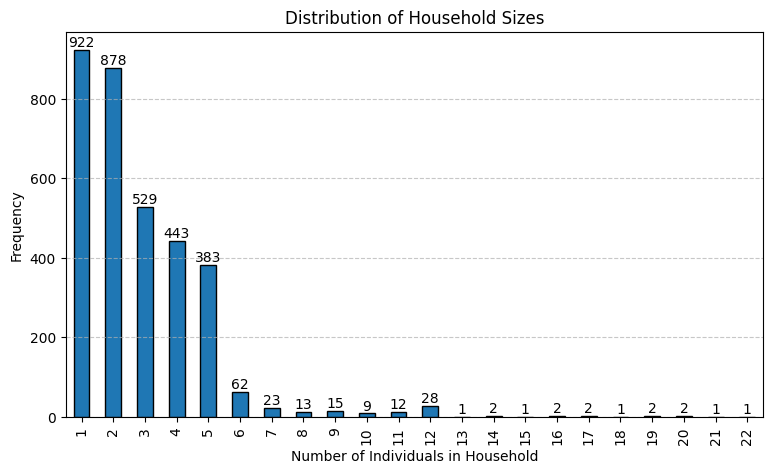

In [328]:
# Calculate house sizes by counting individuals per household
household_sizes = census_data.groupby(['House Number', 'Street']).size()

# Step 2: Count how many households of each size exist
size_distribution = household_sizes.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(9, 5))
size_distribution.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Household Sizes')
plt.xlabel('Number of Individuals in Household')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for i, count in enumerate(size_distribution):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)    


plt.show()


Examine single household median age

In [378]:
# Group dataset by address
household_group = census_data.groupby(['House Number', 'Street'])

# Extract groups with only one person at an address
one_person_households = household_group.filter(lambda x: len(x) == 1)

# Obtain numbers of indiduals in 1-person household who's age 55 or above 
age_greater_or_eq_55 = household_group.filter(lambda x: len(x) == 1 and x['Age'].ge(55).any())

percent_of_55_plus= (len(age_greater_or_eq_55)/len(one_person_households))*100 # Calculate their percentage

# Display median age
print('One-Person Household Median Age: ', single_person_households['Age'].median())

print('\n'+'Percentage of individual in a one-Person household Age 55 or Above: ', percent_of_55_plus)

One-Person Household Median Age:  55.0

Percentage of individual in a one-Person household Age 55 or Above:  51.735357917570504


Obtain Household Distribution Among 1-2 Person Household Based on Marital Status

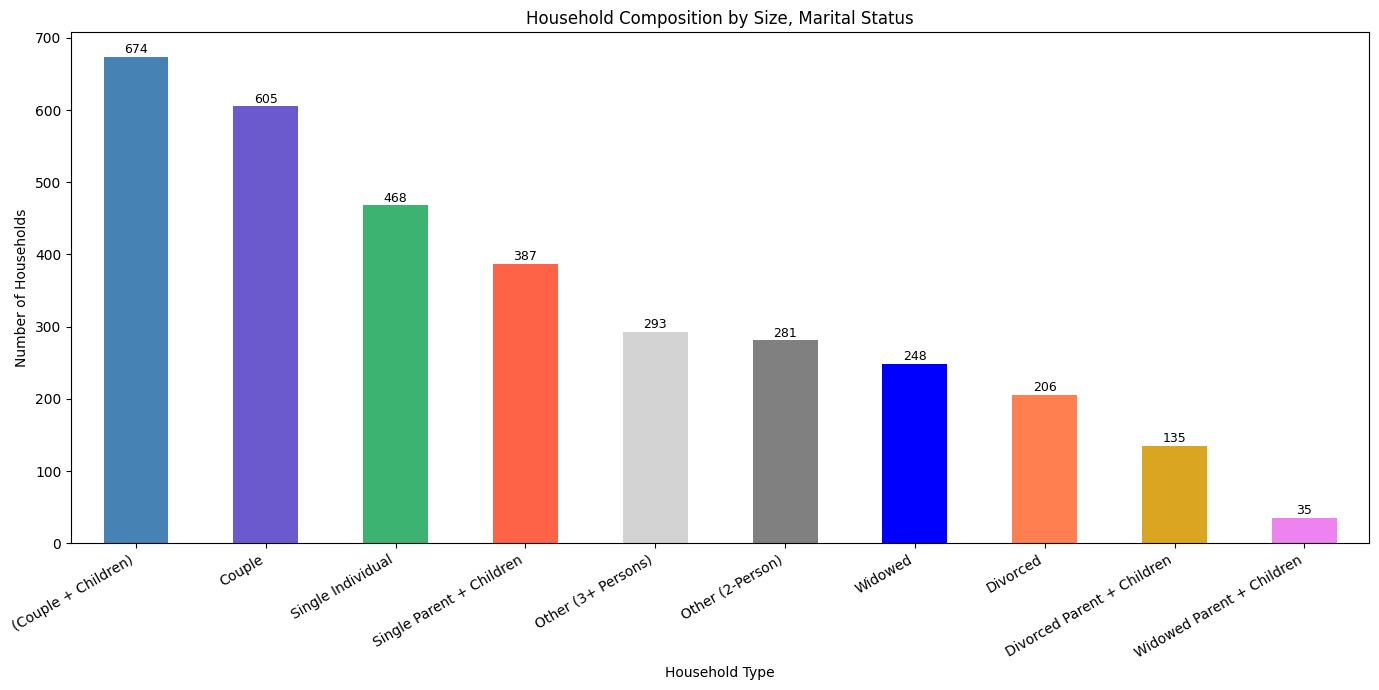

In [394]:
# Function to classify households by: Household size, Marital status composition, Presence of children (minors under 18)

def classify_any_household(group):
    size = len(group)
    statuses = list(group['Marital Status'])
    ages = list(group['Age'])

    # Check for the presence of at least one minor (child)
    has_minor = any(age < 18 for age in ages)

    # Count marital status types
    married_count = statuses.count('Married')
    divorced_count = statuses.count('Divorced')
    widowed_count = statuses.count('Widowed')
    single_count = statuses.count('Single')

    # Classification rules for 1-person households
    if size == 1:
        status = statuses[0]
        if status == 'Divorced':
            return 'Divorced'
        elif status == 'Widowed':
            return 'Widowed'
        else:
            return 'Single Individual'

    # Classification rules for 2-person households
    elif size == 2:
        if married_count == 2:
                return 'Couple'
        elif has_minor and divorced_count >= 1:
            return 'Divorced Parent + Children'
        elif has_minor and single_count >= 1:
            return 'Single Parent + Children'
        elif has_minor and widowed_count >= 1:
            return 'Widowed Parent + Children'
        else:
            return 'Other (2-Person)'

    # Classification rules for larger (3+ person) households
    else:
        if has_minor and married_count >= 2:
            return '(Couple + Children)'
        elif has_minor and single_count >= 1:
            return 'Single Parent + Children'
        elif has_minor and divorced_count >= 1:
            return 'Divorced Parent + Children'
        elif has_minor and widowed_count >= 1:
            return 'Widowed Parent + Children'
        elif not has_minor and married_count >= 2:
            return 'Couple'
        else:
            return 'Other (3+ Persons)'

# Apply the classification function to each household
household_classification_all = household_group.apply(classify_any_household)

# Count the number of households in each classification category
classification_counts_all = household_classification_all.value_counts()


# Define color mapping for each category
color_map_all = {
    'Single Individual': 'mediumseagreen',
    'Divorced': 'coral',
    'Widowed': 'blue',
    'Couple': 'slateblue',
    'Other (2-Person)': 'gray',
    '(Couple + Children)': 'steelblue',
    'Single Parent + Children': 'tomato',
    'Divorced Parent + Children': 'goldenrod',
    'Widowed Parent + Children': 'violet',
    'Other (3+ Persons)': 'lightgray'
}

# Generate a color list that matches the order of the bar chart
colors_all = [color_map_all.get(label, 'lightgray') for label in classification_counts_all.index]

# Plot the bar chart
plt.figure(figsize=(14, 7))
bars = classification_counts_all.plot(kind='bar', color=colors_all)

# Set titles and labels
plt.title('Household Composition by Size, Marital Status')
plt.xlabel('Household Type')
plt.ylabel('Number of Households')
plt.xticks(rotation=30, ha='right')

# Add count labels on top of each bar
for i, count in enumerate(classification_counts_all):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=9)

# Display the plot nicely
plt.tight_layout()
plt.show()


### Occupation and Unemployment Trend

In [149]:
# Define categories by Occupation field
total_pop = len(census_data)
child_count = (census_data['Occupation'] == 'Child').sum()                # pre-school children (occupation labeled "Child")
student_count = (census_data['Occupation'] == 'Student').sum()            # school students
uni_student_count = (census_data['Occupation'] == 'University Student').sum()  # university students
unemployed_count = (census_data['Occupation'] == 'Unemployed').sum()      # unemployed adults
retired_count = census_data['Occupation'].str.startswith("Retired").sum() # retired individuals
employed_count = total_pop - (child_count + student_count + uni_student_count + unemployed_count + retired_count)

    
occ_cat=pd.DataFrame() # Create empty dataframe
occ_cat['Occupation']=["Children 0-4","School Students 5-17","University Students","Unemployed","Retired","Employed"] # Add occupation column
occ_cat['Frequency']= [child_count,student_count,uni_student_count,unemployed_count, retired_count, employed_count]


percentage_list=[] # Create empty list
for i in occ_cat['Frequency']:
    percentage_list.append(round((i/total_pop),4)*100) # Calculate percentage contributed by each group and append to empty list
    
occ_cat['Precentage(%)']= percentage_list # Add percentage to DataFrame 

             Occupation  Frequency  Precentage(%)
0          Children 0-4        517           5.42
1  School Students 5-17       1796          18.82
2   University Students        688           7.21
3            Unemployed        535           5.61
4               Retired        854           8.95
5              Employed       5153          54.00 <BarContainer object of 6 artists> Text(0.5, 0, 'Count') Text(0, 0.5, 'Occupation Categories')


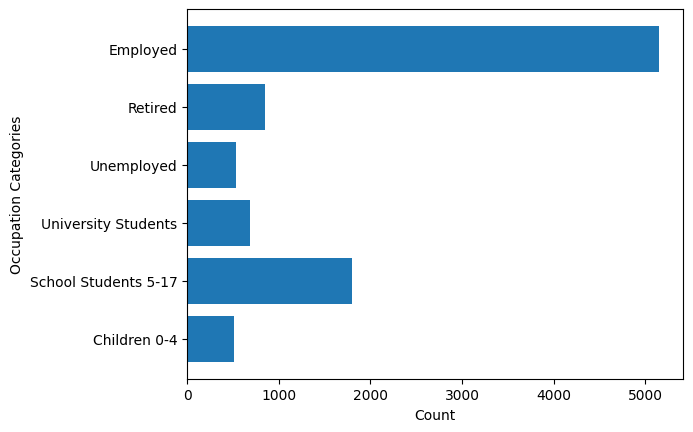

In [150]:
# Print occupation categories
print(occ_cat, plt.barh(occ_cat['Occupation'], occ_cat['Frequency'],),plt.xlabel('Count'),plt.ylabel('Occupation Categories')) 

Examine age ranges among unemployed individual

C:\Users\Rotim\AppData\Local\Temp\ipykernel_19740\515752243.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployed_data['Age Group'] = pd.cut(unemployed_data['Age'], bins=age_bins, labels=age_labels, right=False)


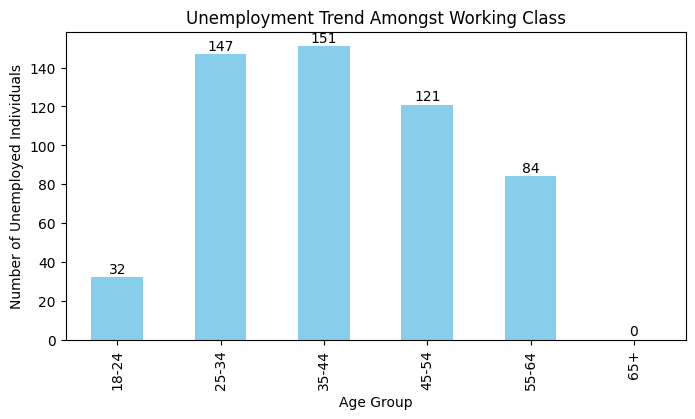

In [262]:
# Filter the data to include only unemployed individuals
unemployed_data = census_data[census_data['Occupation'] == 'Unemployed']

# Define age groups
age_bins = [18, 25, 35, 45, 55, 65, float('inf')]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column for age groups
unemployed_data['Age Group'] = pd.cut(unemployed_data['Age'], bins=age_bins, labels=age_labels, right=False)


# Group the data by age group and count the number of unemployed individuals in each group
age_group_unemployment = unemployed_data.groupby('Age Group').size()

    
# Plot the unemployment trend amongst working class
plt.figure(figsize=(8, 4))
age_group_unemployment.plot(kind='bar', color='skyblue')
plt.title('Unemployment Trend Amongst Working Class')
plt.xlabel('Age Group')
plt.ylabel('Number of Unemployed Individuals')

# Add count labels on top of each bar
for i, count in enumerate(age_group_unemployment):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
    
# Save the plot as an image file
plt.savefig('unemployment_trend_age_groups_with_counts_interval_20.png')

# Show the plot
plt.show()

Examine percentage of unemployment amongst working class

In [259]:
# Define working-age range: 16 to 64 inclusive
working_age_df = census_data[(census_data["Age"] >= 16) & (census_data["Age"] <= 64) & (census_data["Occupation"]!='Student')& (census_data["Occupation"]!='University Student')& (census_data["Occupation"]!='Child')]

# Check for unemployed individuals (case-insensitive match)
unemployed_count = (working_age_df["Occupation"]=="Unemployed").sum()

# Total working-age individuals
total_working_age = working_age_df.shape[0]

# Calculate percentage
unemployment_percentage = (unemployed_count / total_working_age) * 100
print('Total Working Age minus Students: ',total_working_age,'Unemployed Count: ', unemployed_count,'Unemployment Percentage: ',unemployment_percentage)

Total Working Age minus Students:  5550 Unemployed Count:  535 Unemployment Percentage:  9.63963963963964


### Commuter Rate
Create a function that group individual to commuter or not based on type of job

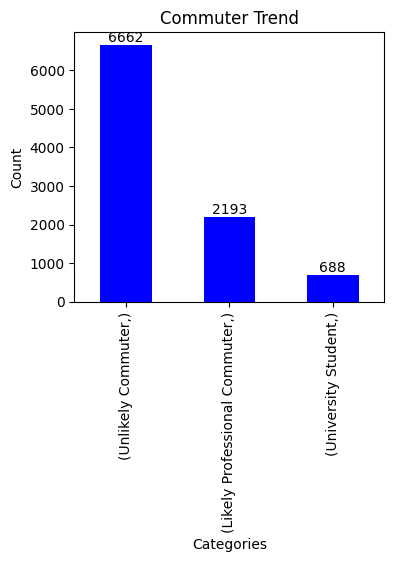

In [288]:
# Create lists of keywords that indicate commuting or student roles
likely_prof_commuter = [
    'Engineer', 'Doctor', 'Scientist', 'Surveyor', 'Lecturer', 'Programmer', 
    'Producer', 'Pharmacist', 'Nurse', 'Accountant', 'Psychologist', 
    'Librarian', 'Geologist', 'Journalist', 'Conveyancer', 'Technician', 
    'Designer', 'Administrator', 'IT', 'Software', 'Sales'
]                    # List containing keywords of job titles that may require commuting

university_student = ['University Student']

# Define a function to classify each occupation
def classify_occupation(occupation):
    if any(keyword in occupation for keyword in university_student):
        return 'University Student'
    elif any(keyword in occupation for keyword in likely_prof_commuter):
        return 'Likely Professional Commuter'
    elif occupation in ['Unemployed', 'Child', 'Student', 'Retired']:
        return 'Unlikely Commuter'
    else:
        return 'Unlikely Commuter'
commuter_df= pd.DataFrame()
# Apply classification to a new column
commuter_df['Commuter Category'] = census_data['Occupation'].apply(classify_occupation)

# Preview classification
commuter_count= commuter_df.value_counts()

# Plot the commuter trend
plt.figure(figsize=(4, 3.5))
commuter_count.plot(kind='bar', color='blue')
plt.title('Commuter Trend')
plt.xlabel('Categories')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, count in enumerate(commuter_count):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
    
# Save the plot as an image file
plt.savefig('commuter trend.png')

### Religion Composition

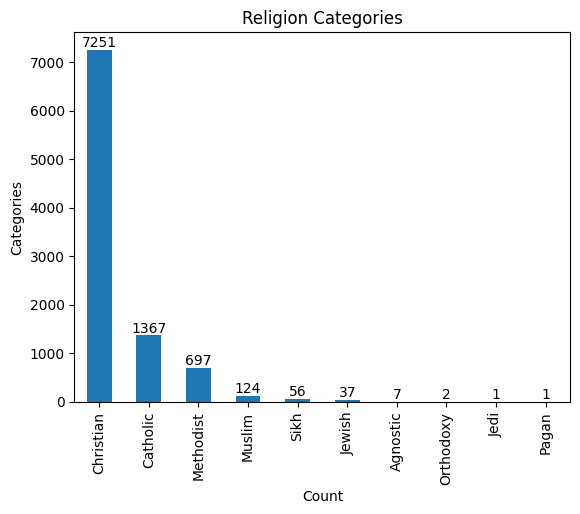

None


In [431]:
# Obtain frequency of unique entries in marital status
religion= census_data['Religion'].value_counts()
religion.plot(kind='bar')
plt.title("Religion Categories")
plt.xlabel('Count')
plt.ylabel('Categories')

# Add count labels on top of each bar
for i, count in enumerate(religion):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
print(plt.show())

### Marital Status and Family Structure

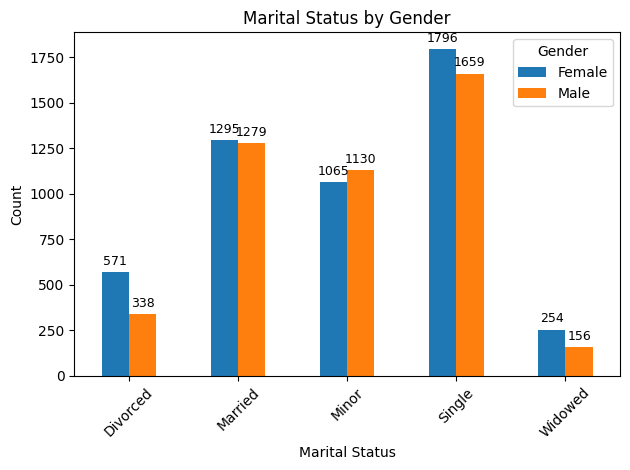

In [468]:
# Create a grouped count of Marital Status by Gender
grouped = census_data.groupby(['Marital Status', 'Gender']).size().unstack()

# Plot
ax = grouped.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

plt.show()


Obtain Marital statuses distribution across all classes excluding Minor

In [556]:
# Total population excluding minor
adult_population = len(census_data[census_data['Marital Status']!='Minor'])

# Extract number of married individuals
num_married = len(census_data[census_data['Marital Status']=='Married'])

# Extract number of widowed individuals
num_widowed = len(census_data[census_data['Marital Status']=='Widowed'])

# Extract number of single individuals
num_single = len(census_data[census_data['Marital Status']=='Single'])

# Extract number of divorce individuals
num_divorced = len(census_data[census_data['Marital Status']=='Divorced'])


# Calculate marriage rate per 1,000 people
marriage_rate_per_1000 = (num_married / adult_population) * 1000

list_5=['Married', 'Single', 'Divorced', 'Widowed']
list_6=[num_married,num_single,num_divorced, num_widowed]
list_7=[]
for i in list_6:
    list_7.append(round(((i/adult_population)*1000),2))

# Create a summary DataFrame
mar_status_summary = pd.DataFrame()
mar_status_summary['Marital Status']=list_5
mar_status_summary['Count']=list_6
mar_status_summary['Count/1000 Adult']=list_7

# Display the summary
print(mar_status_summary)

  Marital Status  Count  Count/1000 Adult
0        Married   2574            350.30
1         Single   3455            470.20
2       Divorced    909            123.71
3        Widowed    410             55.80


### Birth Rate

In [528]:
# Birth Rate trend
age_0=len(census_data[census_data['Age']==0])/total_population*1000 # age 0

age_1=len(census_data[census_data['Age']==1])/total_population*1000 # age 1

age_2=len(census_data[census_data['Age']==2])/total_population*1000

age_3=len(census_data[census_data['Age']==3])/total_population*1000

age_4=len(census_data[census_data['Age']==4])/total_population*1000


list_3=['Current year','Previous year','2 years ago','3 years ago','4 years ago']
list_4=[age_0,age_1,age_2,age_3,age_4]
birth_rate=pd.DataFrame()
birth_rate['Year']= list_3
birth_rate['Birth_Rate per 1000']= list_4
birth_rate

,Year,Birth_Rate per 1000
0,Current year,8.907052
1,Previous year,9.535785
2,2 years ago,10.688463
3,3 years ago,11.631562
4,4 years ago,13.308184


In [533]:
# Number of women of child bearing age
child_bearing_women=len(census_data[(census_data['Age']>=15)&(census_data['Age']<=45)& (census_data['Gender']=='Female')])
# Total female population
female_pop= len(census_data[census_data['Gender']=='Female'])

#Percentage of child bearing women
percent= (child_bearing_women/female_pop)*100


list_1=['Number Of Women Of Child Bearing Age','Total Female Population','Percentage of Women Of Child Bearing Age']
list_2=[child_bearing_women, female_pop, percent]
child_bear= pd.DataFrame()
child_bear['Entries']=list_1
child_bear['Figures']=list_2

child_bear

,Entries,Figures
0,Number Of Women Of Child Bearing Age,2464.000000
1,Total Female Population,4981.000000
2,Percentage of Women Of Child Bearing Age,49.467978


### Potential For Future Elderly in The Population

In [543]:
# Filter for individuals aged 55–64 
num_soon_elderly = len(census_data[(census_data['Age'] >= 55) & (census_data['Age'] < 65)])

# Calculate percentage of future elderly in the population
soon_elderly_per_1000 = (num_soon_elderly / total_population) * 100

# Put summary in DataFrame
soon_elderly_summary = pd.DataFrame({
    'Population Aged 55-64': [num_soon_elderly],
    '% in Population': [round(soon_elderly_per_1000, 2)]
})

# Print result
print(soon_elderly_summary)


   Population Aged 55-64  % in Population
0                    988            10.35
